## Objective
The objective is to build a classification model which can predict whether an account is becoming a Bad Debt. This prediction can help to forecast the number (and value) of accounts that are at risk of developing into a Bad Debt.


### Evaluation Criteria: Mean Precision Score

Mean of precision of all the classes = (P1+P2)/2  Here P1 is Precision of  Class 1 and P2 is Precision of Class2.


## Data Input:

There are two files:-
* account_train.csv - for training the model
* account_test.csv - for prediction and submission


## Data Dictionary:

* AccID: An unique id for the account
* CategoryID: An unique id for the category of the society
* Category: Category of society 
* Value: The market value of the particular property (account)
* PropertySize: The size of the property in square meters
* BillingAmt: The total amount payable by the resident to the society management
* AverageBillingAmt: The average amount payable by the resident to the society management
* CollectedAmt: The total amount collected from the resident 
* AverageCollectedAmt: The average amount collected from the resident 
* DebtAmt: The Total Debt that is at 90 days or more
* WriteOffAmt: The Total amount of debt that has been written off
* CollectionRatio: The ratio between the Total amount collected and Total Billing (ie. CollectedAmt/ BillingAmt)
* DebtBillingRatio: The ratio between the Total Debt and Total Billing (ie. (Total Debt + Total Write Off)/Total Billing)
* TotalElectricityBill: The total amount billed for electricity. This field was put in place because it is used as a means to recover debt - ie. If an amount is outstanding for any service the management has the right to cut a consumer's electricity connection.
* HasID: The resident has an ID number. 
*  Label: 1 = Is considered to be a Bad Debt, 0 = Not considered to be a Bad Debt

## Understand Given Data

Read given data to data frame and understand data nature, given features, total records, given data has any missing values or duplicate data, outliers. 

Visualize data and and understand data range and outliers 

### Loading necessary libraries for EDA

Load all standard python library packages.

#### Data Manipulation
* Numpy
* Pandas

#### Data Visualization
* matplotlib.pyplot
* seaborn


In [44]:
# this will help in making the Python code more structured automatically
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


<IPython.core.display.Javascript object>

In [47]:
TRAIN_DATA_URL = "https://raw.githubusercontent.com/GL-AIML-International/gl-pgp-aiml-ba-uta-intl-june21-balanzer/main/src/projects/Hackathons/account_train_(1).csv?token=AFY32NQK4RJYSSQDMG77AF3BOJJ42"


# reading  data given from bank and load to data frame
# debt = pd.read_csv(TRAIN_DATA_URL)
debt = pd.read_csv("account_train_(1).csv")
# copying orignal data so that when changing data we dont lose original
data = debt.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [48]:
data.head(5)

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
0,c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a,1,Residential,2674700,585,43717,729,43416,4342,0,0,0.99,0.00,0,0,0
1,95daa45d-3dfd-4c60-aae4-05e78b0de26e,1,Residential,36000,315,378,3,522,522,0,0,1.38,0.00,0,0,0
2,40536c2d-c0a2-4486-b0aa-60b36dfa290a,1,Residential,700000,528,25150,345,25104,349,0,0,1.00,0.00,10715,1,0
3,52a2254d-44e5-4dc9-8e08-1b135096172c,5,Municipal,40000,0,4773,133,0,0,7319,0,0.00,1.53,0,1,1
4,1e0363e4-2029-4b62-a9ec-d909cee000cb,1,Residential,125800,0,-4,0,445,445,0,0,-121.26,0.00,0,0,0


<IPython.core.display.Javascript object>

In [49]:
data.tail(5)

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
100471,3ade0e2d-b0c1-4092-bae3-f2fba62fb6af,1,Residential,145000,309,2888,78,0,0,25835,0,0.00,8.95,0,1,1
100472,5ac71a8f-b457-4c01-84ee-5a0b89387d0c,1,Residential,750000,1176,31169,427,31091,432,0,0,1.00,0.00,15616,1,0
100473,7d8cdaa6-13a6-4aef-a2c2-3091be566bfb,1,Residential,165000,360,6665,79,3400,378,4974,0,0.51,0.75,0,1,1
100474,151da2b4-8fe2-4607-b415-14cf09ace6f8,1,Residential,2088500,2146,53907,499,34639,4330,128096,0,0.64,2.38,26939,1,1
100475,c18b83ee-8bf0-49e8-98fa-09db6bd581c3,1,Residential,23160,276,1034,20,2100,75,0,16216,2.03,15.68,352,0,1


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [50]:
data.shape

(100476, 16)

<IPython.core.display.Javascript object>

### Check the data types of the columns in the dataset.

checking data types of all columns 

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AccID                 100476 non-null  object 
 1   CategoryID            100476 non-null  int64  
 2   Category              100476 non-null  object 
 3   Value                 100476 non-null  int64  
 4   PropertySize          100476 non-null  int64  
 5   BillingAmt            100476 non-null  int64  
 6   AverageBillingAmt     100476 non-null  int64  
 7   CollectedAmt          100476 non-null  int64  
 8   AverageCollectedAmt   100476 non-null  int64  
 9   DebtAmt               100476 non-null  int64  
 10  WriteOffAmt           100476 non-null  int64  
 11  CollectionRatio       100476 non-null  float64
 12  DebtBillingRatio      100476 non-null  float64
 13  TotalElectricityBill  100476 non-null  int64  
 14  HasID                 100476 non-null  int64  
 15  

<IPython.core.display.Javascript object>

### Summary of the data

In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CategoryID,100476.0,2.245511,2.730572e+00,1.0,1.0,1.0,2.00,13.0
Value,100476.0,707020.754379,3.047463e+06,0.0,35000.0,93000.0,750000.00,421860000.0
PropertySize,100476.0,746822.707124,5.651558e+06,0.0,276.0,511.0,1162.00,270515963.0
BillingAmt,100476.0,10899.514083,1.262341e+05,-4232630.0,461.0,3141.0,8715.00,26133617.0
AverageBillingAmt,100476.0,575.486484,6.430310e+03,-79384.0,23.0,107.0,281.00,805044.0
CollectedAmt,100476.0,9763.645487,1.201449e+05,-219260.0,0.0,360.0,7402.25,24371134.0
AverageCollectedAmt,100476.0,2044.687786,3.682487e+04,-219260.0,0.0,100.0,768.00,6828297.0
DebtAmt,100476.0,9642.500070,5.003013e+04,0.0,0.0,0.0,2298.00,6322610.0
WriteOffAmt,100476.0,602.765327,1.440915e+04,0.0,0.0,0.0,0.00,4306605.0
CollectionRatio,100476.0,19.536208,5.556991e+03,-115000.0,0.0,0.5,1.00,1701912.0


<IPython.core.display.Javascript object>

In [53]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) for all columns in input data frame
    """
    print("\nTotal Null value counts\n")
    print(df.isnull().sum().sort_values(ascending=False))


print_null_info(data)


Total Null value counts

AccID                   0
CategoryID              0
Category                0
Value                   0
PropertySize            0
BillingAmt              0
AverageBillingAmt       0
CollectedAmt            0
AverageCollectedAmt     0
DebtAmt                 0
WriteOffAmt             0
CollectionRatio         0
DebtBillingRatio        0
TotalElectricityBill    0
HasID                   0
Label                   0
dtype: int64


<IPython.core.display.Javascript object>

In [54]:
# check for any duplciate data
data[data.duplicated()].shape

(0, 16)

<IPython.core.display.Javascript object>

In [55]:
#    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
            print()
            print(f"Column name : ({col}), Column Data Type : ({df[col].dtypes}) and has total : ({df[col].nunique()}) unique values")
            print()
            print(f"Top 10 Unique Values & Value counts ")
            print()
            print(df[col].value_counts()[0:10])
            print()
            print("-" * 50)


<IPython.core.display.Javascript object>

In [56]:
# print value types and value counts

cols = ["AccID", "CategoryID", "Category", "HasID", "Label"]

print_category_value_counts(data, cols)



Column name : (AccID), Column Data Type : (object) and has total : (100476) unique values

Top 10 Unique Values & Value counts 

f3ac7911-8ace-41b0-ae66-3d5f1f96f4fb    1
a0451fab-0ce3-4eac-9df4-17894fb0a154    1
5d5714ae-64f0-475b-a113-875c362b1aad    1
db0dd80e-86c1-4e4b-ab17-1448722e0b38    1
546b2a3a-1123-4f97-9049-228cbd650e5f    1
88097a3e-8b60-4816-982c-8f0965fa3238    1
861fb324-298c-424a-a4f4-90609fa1b587    1
d4ec7a2c-74f6-4682-bda5-8ab92a9e05c7    1
eb8dd28c-caa4-4e64-8f12-60c061ca92ba    1
5da8701c-ec83-4a1f-8222-fd1401ee7944    1
Name: AccID, dtype: int64

--------------------------------------------------

Column name : (CategoryID), Column Data Type : (int64) and has total : (12) unique values

Top 10 Unique Values & Value counts 

1     74339
4      7559
11     6642
2      5871
6      2878
5      2198
7       388
12      335
3       181
8        69
Name: CategoryID, dtype: int64

--------------------------------------------------

Column name : (Category), Column Data

<IPython.core.display.Javascript object>

In [57]:
# Drop CategoryID, AccID Columns - we can use Category in future
data.drop(["CategoryID", "AccID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [58]:
# create a list those columns should be converted as category
cat_vars = ["Category"]

for colname in cat_vars:
    data[colname] = data[colname].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Category              100476 non-null  category
 1   Value                 100476 non-null  int64   
 2   PropertySize          100476 non-null  int64   
 3   BillingAmt            100476 non-null  int64   
 4   AverageBillingAmt     100476 non-null  int64   
 5   CollectedAmt          100476 non-null  int64   
 6   AverageCollectedAmt   100476 non-null  int64   
 7   DebtAmt               100476 non-null  int64   
 8   WriteOffAmt           100476 non-null  int64   
 9   CollectionRatio       100476 non-null  float64 
 10  DebtBillingRatio      100476 non-null  float64 
 11  TotalElectricityBill  100476 non-null  int64   
 12  HasID                 100476 non-null  int64   
 13  Label                 100476 non-null  int64   
dtypes: category(1), float64(2), int64(11

<IPython.core.display.Javascript object>

# Exploratory Data Analysis

In [59]:
## building a Common method to generate graphs


def generate_univariate_chart(data, feature, hue=None, kde=False, bins=20):
    """
    Builds histplot and boxplot for given field.
    Can plot hue, kde and bins based on params, these are optional columns
    """

    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature : {feature}")
    # sns.set_context('poster',font_scale=1)
    # figsize(width,height)

    fig, axes = plt.subplots(2, figsize=(15, 15))
    fig.suptitle("Univariate analysis for " + feature)

    sns.histplot(
        data=data,
        x=feature,
        ax=axes[0],
        palette="winter",
        bins=bins,
        kde=kde,
        hue=hue,
        multiple="dodge",
    )
    sns.boxplot(
        data=data, x=feature, ax=axes[1], showmeans=True, color="violet", hue=hue
    )


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 10))
    else:
        plt.figure(figsize=(n + 1, 10))

    plt.xticks(rotation=90, fontsize=25)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    """
    function to plot distributions wrt target
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 100)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


## this method generate joint plot of x vs y feature
def generate_bivariate_chart(data, xfeature, yfeature, hue=None):
    """
    common method to generate joint plot for various columns
    hue param is optional
    """
    sns.set_style("darkgrid")
    print(f"Genrating Charts for feature x : {xfeature}, y : {yfeature}")

    sns.jointplot(
        data=data,
        x=xfeature,
        y=yfeature,
        palette="winter",
        height=10,
        kind="scatter",
        hue=hue,
    )

<IPython.core.display.Javascript object>

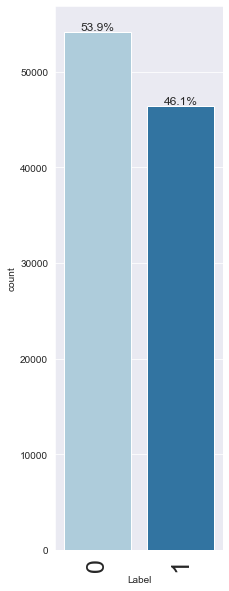

<IPython.core.display.Javascript object>

In [60]:
labeled_barplot(data=data, feature="Label", perc=True)